## ARIMA example from Kaggle

See https://www.kaggle.com/magiclantern/co2-emission-forecast-with-python-arima-v2 (improved and working version forked from  https://www.kaggle.com/berhag/co2-emission-forecast-with-python-seasonal-arima)

Playing around with ARIMA (Autoregressive Integrated Moving Average) as well as some exploratory analysis techniques

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import itertools

In [2]:
rcParams['figure.figsize'] = 15, 12

In [3]:
dfc = pd.read_csv("./sample_co2_data.csv")
dfc.sample(n=5)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
1751,PCEIEUS,197702,.016,4,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide
2312,RFEIEUS,197610,19.38,5,Residual Fuel Oil Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
2655,RFEIEUS,200302,5.973,5,Residual Fuel Oil Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
4589,TXEIEUS,197710,112.595,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5042,TXEIEUS,201208,208.316,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [4]:
dfc[(dfc.MSN == 'DKEIEUS') & (pd.to_numeric(dfc.Value, errors='coerce') > 19)]

,MSN,YYYYMM,Value,Column_Order,Description,Unit
1144,DKEIEUS,197313,19.914,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
1157,DKEIEUS,197413,22.525,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
1196,DKEIEUS,197713,20.671,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
1209,DKEIEUS,197813,20.151,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide


In [5]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
MSN             5094 non-null object
YYYYMM          5094 non-null int64
Value           5094 non-null object
Column_Order    5094 non-null int64
Description     5094 non-null object
Unit            5094 non-null object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [6]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors='coerce')
df = pd.read_csv("sample_co2_data.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.sample(n=5)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1989-10-01,GEEIEUS,.031,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
NaT,NNEIEUS,157.703,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1989-04-01,RFEIEUS,9.071,5,Residual Fuel Oil Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
2013-05-01,TXEIEUS,154.325,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1978-04-01,PCEIEUS,.12,4,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide


In [7]:
df[(df.MSN == 'DKEIEUS') & (pd.to_numeric(df.Value, errors='coerce') > 19)]

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
NaT,DKEIEUS,19.914,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
NaT,DKEIEUS,22.525,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
NaT,DKEIEUS,20.671,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
NaT,DKEIEUS,20.151,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide


In [8]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values].copy()
ts.sample(n=5)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1984-03-01,GEEIEUS,Not Available,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1979-08-01,PCEIEUS,.072,4,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide
2006-10-01,TXEIEUS,193.312,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2003-02-01,PAEIEUS,8.691,6,Petroleum Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1998-07-01,CLEIEUS,174.995,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [101]:
ts.shape
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4323 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
MSN             4323 non-null object
Value           4323 non-null float64
Column_Order    4323 non-null int64
Description     4323 non-null object
Unit            4323 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 202.6+ KB


In [10]:
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts[ts.MSN == 'GEEIEUS'].head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,GEEIEUS,NaN,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1973-02-01,GEEIEUS,NaN,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1973-03-01,GEEIEUS,NaN,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1973-04-01,GEEIEUS,NaN,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1973-05-01,GEEIEUS,NaN,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide


In [11]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
MSN             4707 non-null object
Value           4323 non-null float64
Column_Order    4707 non-null int64
Description     4707 non-null object
Unit            4707 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 220.6+ KB


In [12]:
ts

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [13]:
ts.dropna(inplace = True)
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4323 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
MSN             4323 non-null object
Value           4323 non-null float64
Column_Order    4323 non-null int64
Description     4323 non-null object
Unit            4323 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 202.6+ KB


In [14]:
ts[ts.MSN == 'GEEIEUS'].head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1989-01-01,GEEIEUS,0.031,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1989-02-01,GEEIEUS,0.028,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1989-03-01,GEEIEUS,0.031,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1989-04-01,GEEIEUS,0.030,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1989-05-01,GEEIEUS,0.031,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide


In [15]:
Energy_sources = ts.groupby('Description')

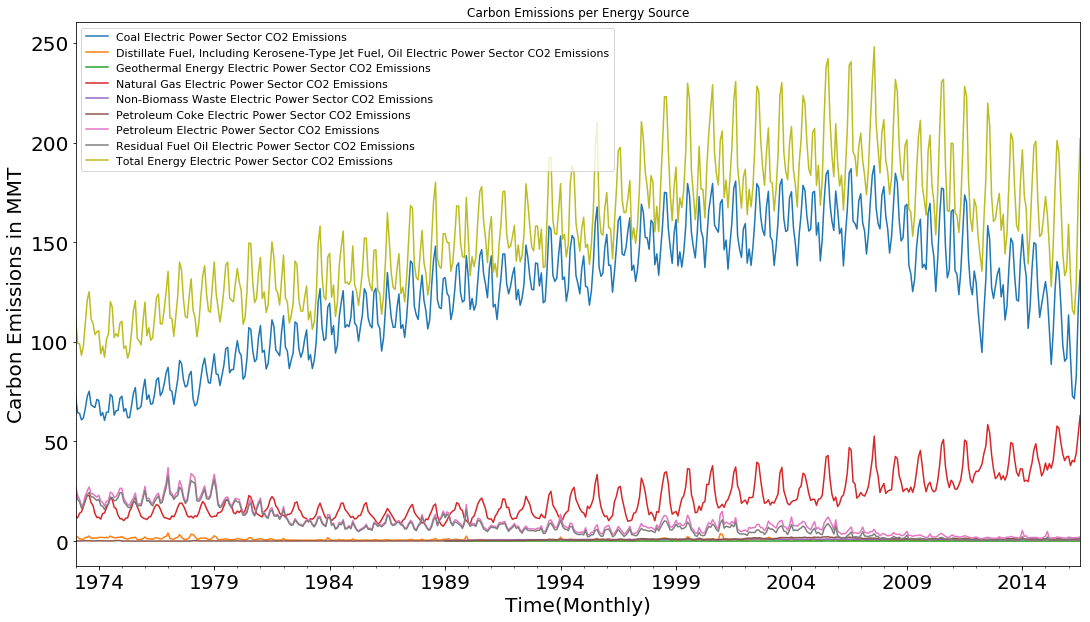

In [16]:
fig, ax = plt.subplots(figsize=(18, 10))
for desc, group in Energy_sources:
    group.plot(y='Value', label=desc,ax = ax, title='Carbon Emissions per Energy Source', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 11)

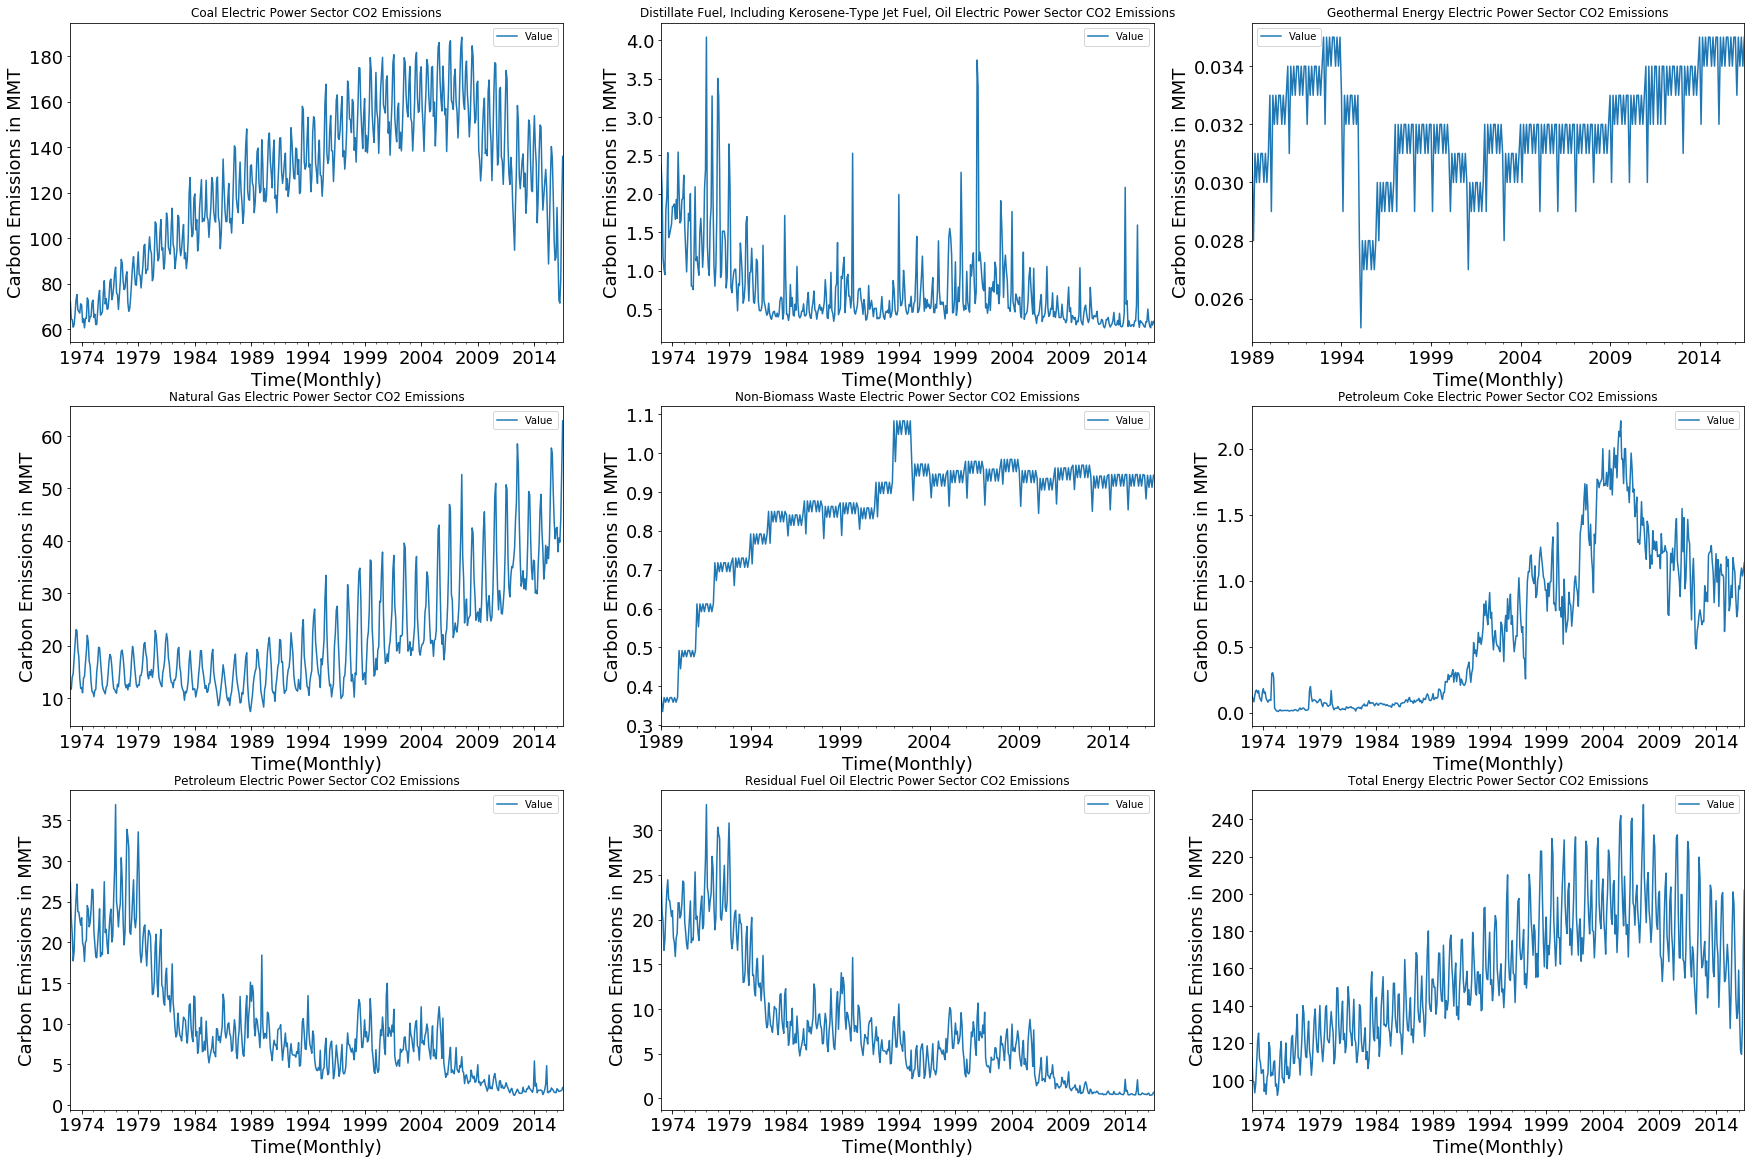

In [17]:
fig, axes = plt.subplots(3,3, figsize = (30, 20))
for (desc, group), ax in zip(Energy_sources, axes.flatten()):
    group.plot(y='Value',ax = ax, title=desc, fontsize = 18)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

In [18]:
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()

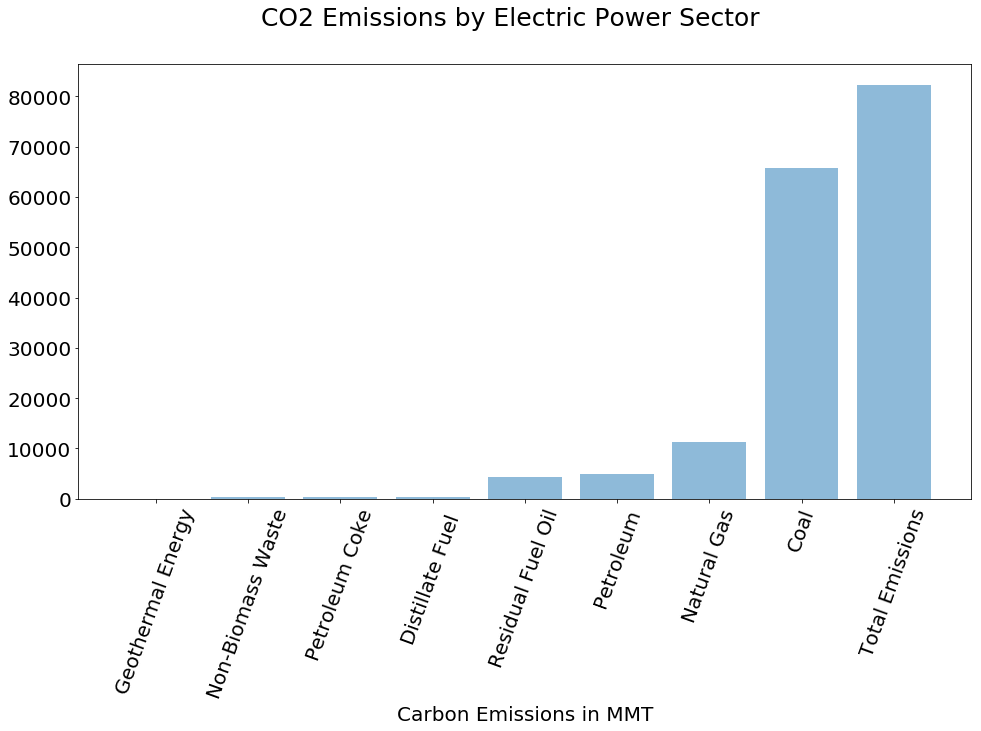

In [19]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']
fig = plt.figure(figsize = (16,8))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()

In [20]:
Emissions = ts.iloc[:,1:]   # Monthly total emissions (mte)
Emissions= Emissions.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level = 0)
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)
mte.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [21]:
mte.tail()

YYYYMM
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [22]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

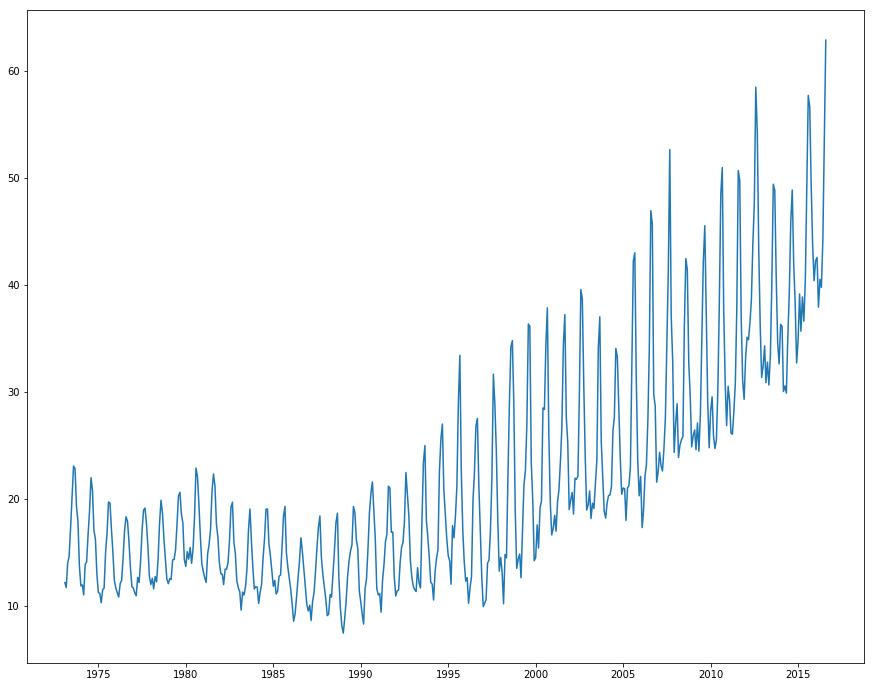

In [23]:
plt.plot(mte)

In [24]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std Dev')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [25]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

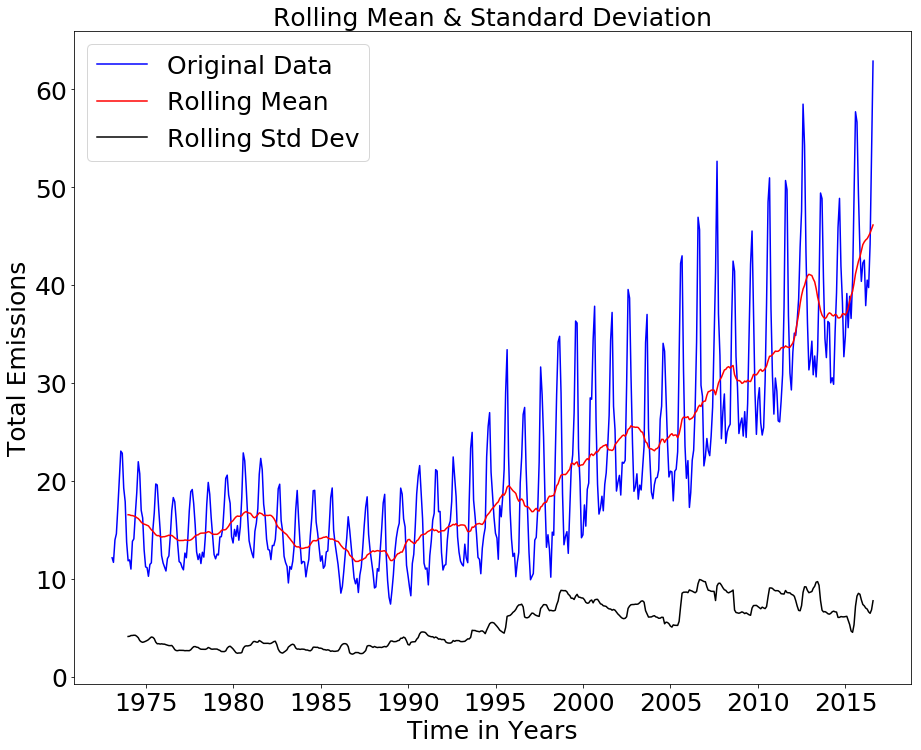

In [26]:
TestStationaryPlot(mte)

In [27]:
TestStationaryAdfuller(mte)

Test Statistic                   1.831215
p-value                          0.998409
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


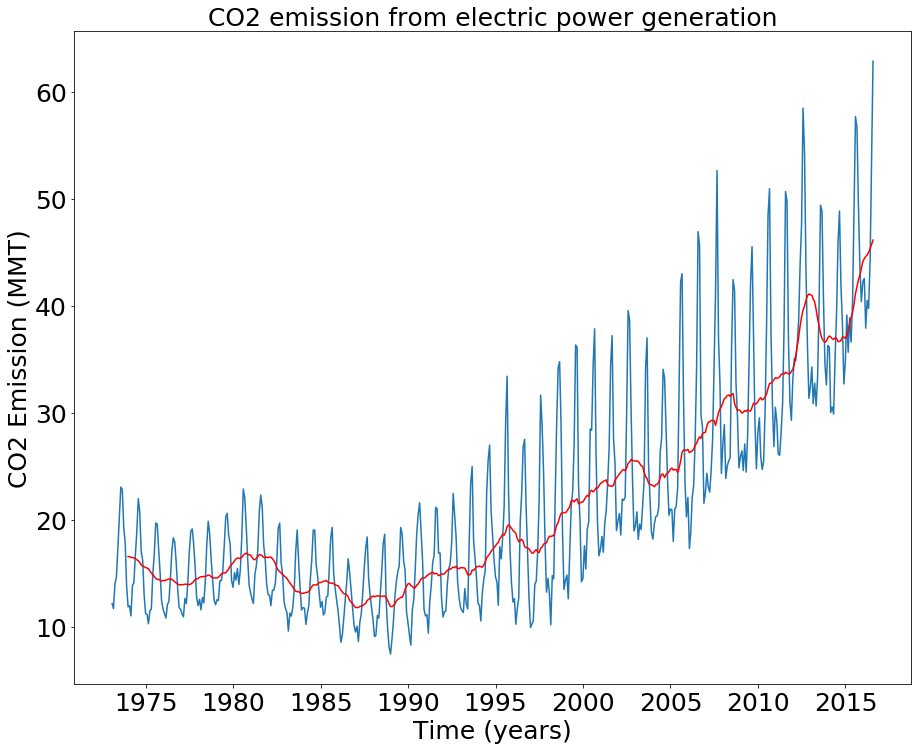

In [28]:
moving_avg = mte.rolling(12).mean()
plt.plot(mte)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission (MMT)', fontsize = 25)
plt.title('CO2 emission from electric power generation', fontsize = 25)
plt.show()

In [29]:
mte_moving_avg_diff = mte - moving_avg
mte_moving_avg_diff.head(13)

YYYYMM
1973-01-31         NaN
1973-02-28         NaN
1973-03-31         NaN
1973-04-30         NaN
1973-05-31         NaN
1973-06-30         NaN
1973-07-31         NaN
1973-08-31         NaN
1973-09-30         NaN
1973-10-31         NaN
1973-11-30         NaN
1973-12-31   -4.705333
1974-01-31   -4.594333
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

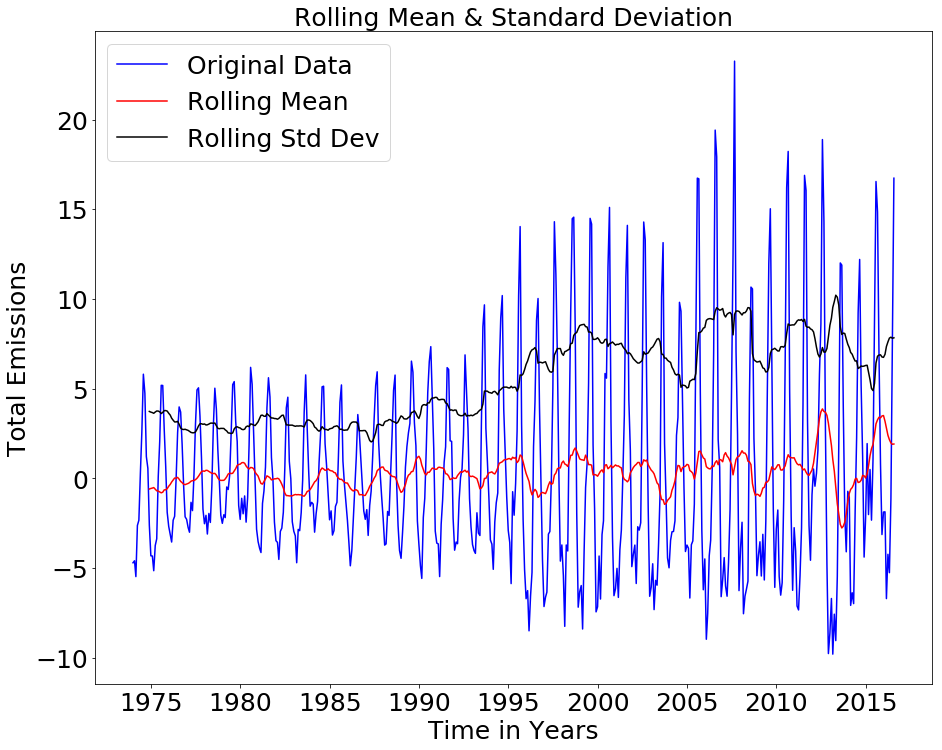

In [30]:
mte_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(mte_moving_avg_diff)

In [31]:
TestStationaryAdfuller(mte_moving_avg_diff)

Test Statistic                  -5.138977
p-value                          0.000012
#Lags Used                      19.000000
Number of Observations Used    492.000000
Critical Value (1%)             -3.443711
Critical Value (5%)             -2.867432
Critical Value (10%)            -2.569908
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


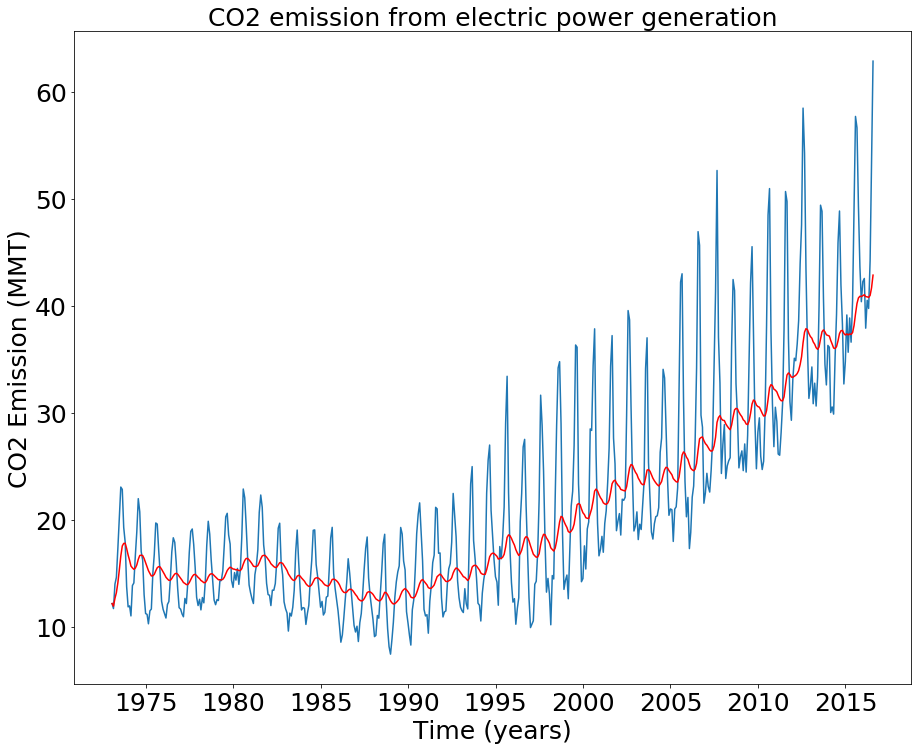

In [32]:
mte_exp_weighted_avg = mte.ewm(halflife=12).mean()
plt.plot(mte)
plt.plot(mte_exp_weighted_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission (MMT)', fontsize = 25)
plt.title('CO2 emission from electric power generation', fontsize = 25)
plt.show()

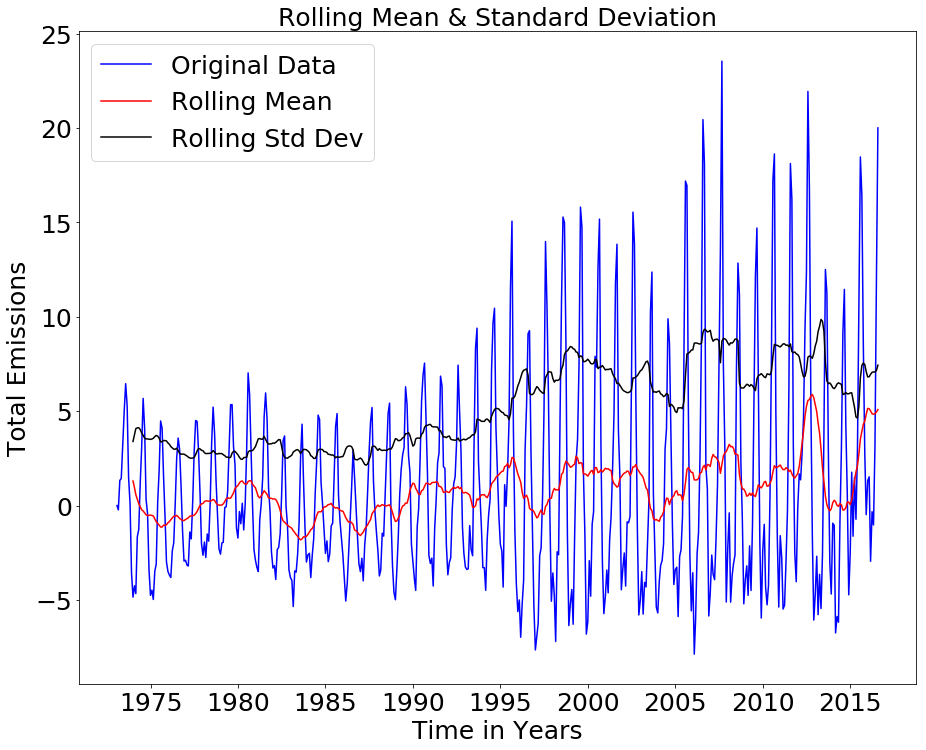

In [33]:
mte_ewma_diff = mte - mte_exp_weighted_avg
TestStationaryPlot(mte_ewma_diff)

In [34]:
TestStationaryAdfuller(mte_ewma_diff)

Test Statistic                  -3.423915
p-value                          0.010170
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


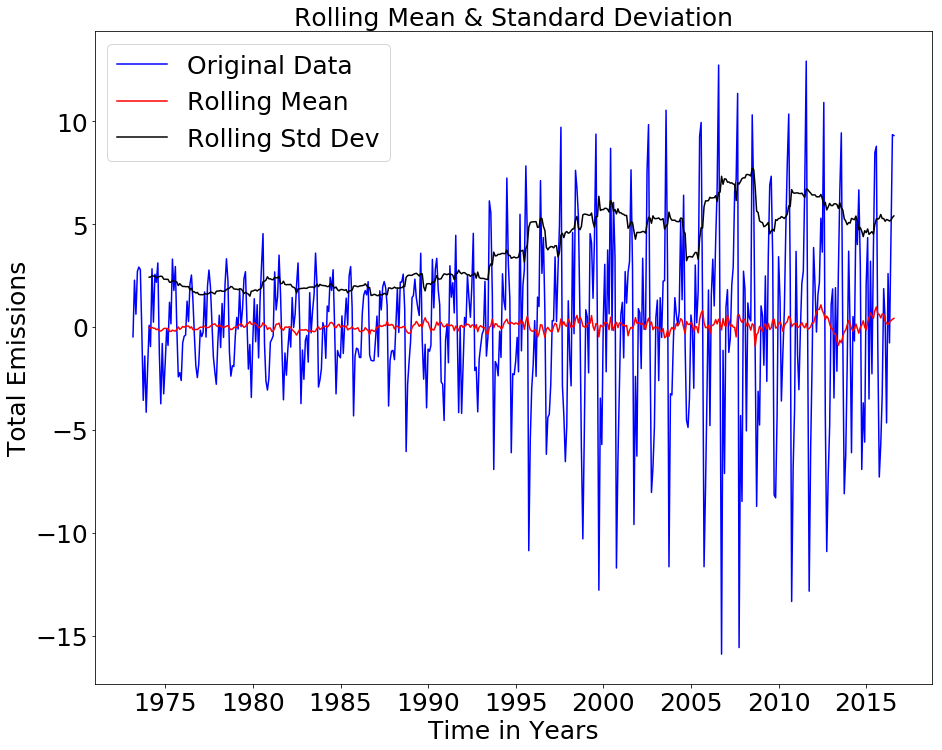

In [35]:
mte_first_difference = mte - mte.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [36]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                  -5.435116
p-value                          0.000003
#Lags Used                      18.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


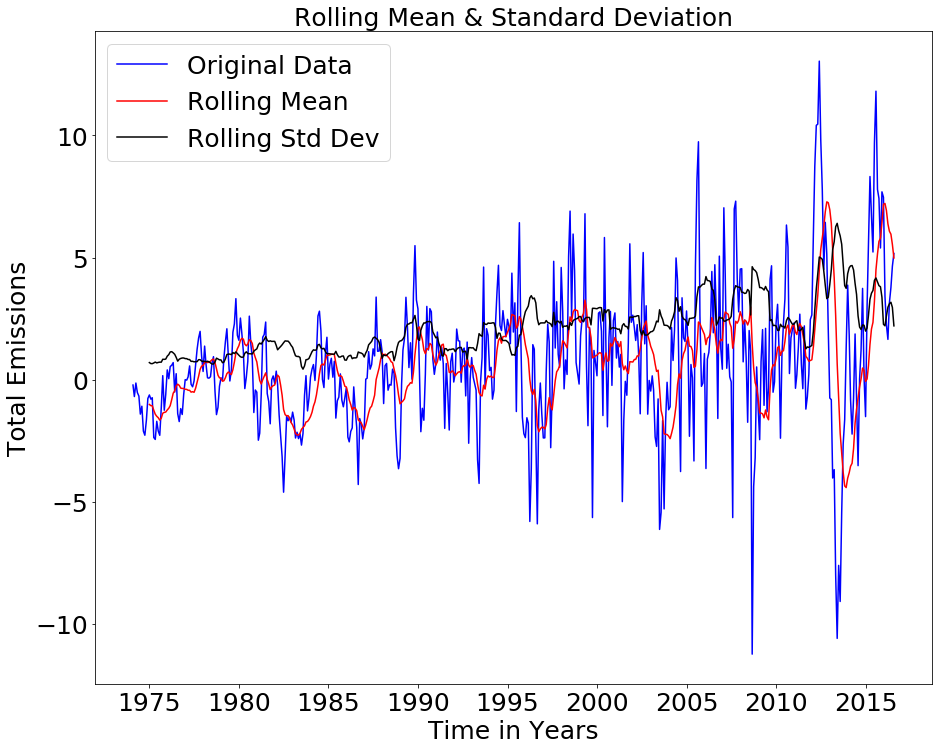

Test Statistic                  -4.412396
p-value                          0.000282
#Lags Used                      13.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [37]:
mte_seasonal_difference = mte - mte.shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

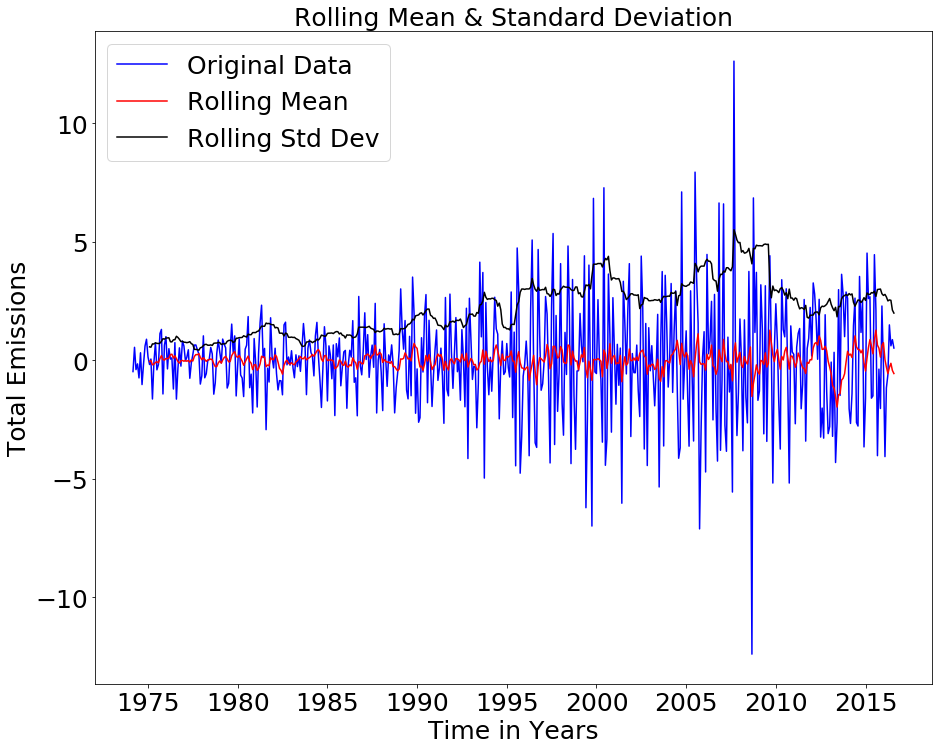

In [38]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

In [39]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -1.009743e+01
p-value                        1.081539e-17
#Lags Used                     1.200000e+01
Number of Observations Used    4.970000e+02
Critical Value (1%)           -3.443576e+00
Critical Value (5%)           -2.867373e+00
Critical Value (10%)          -2.569877e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


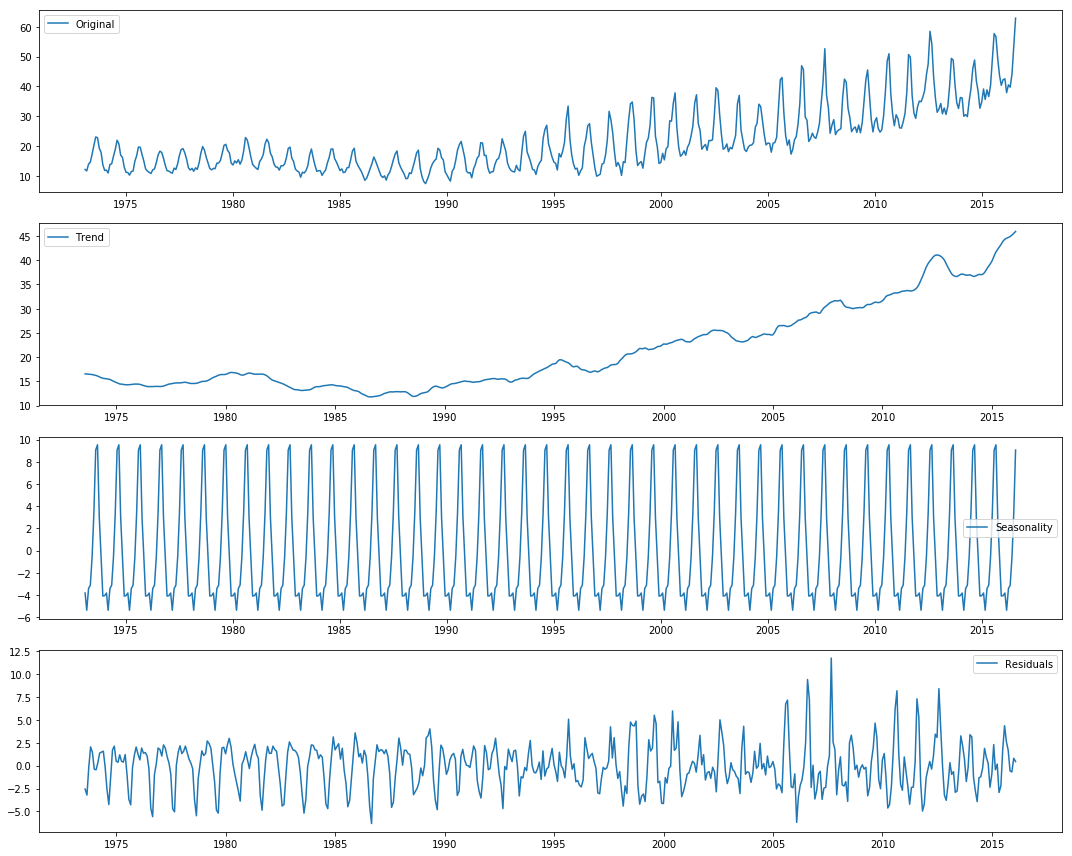

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(mte)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(mte, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

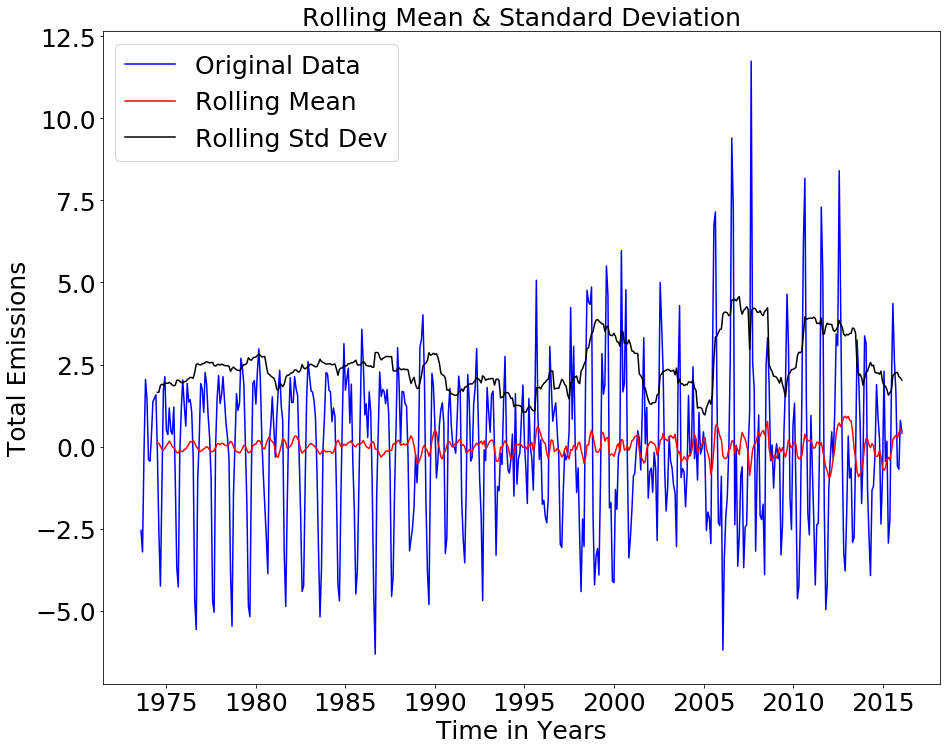

Test Statistic                -8.547084e+00
p-value                        9.439345e-14
#Lags Used                     1.900000e+01
Number of Observations Used    4.910000e+02
Critical Value (1%)           -3.443739e+00
Critical Value (5%)           -2.867444e+00
Critical Value (10%)          -2.569915e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [41]:
mte_decompose = residual
mte_decompose.dropna(inplace=True)
TestStationaryPlot(mte_decompose)
TestStationaryAdfuller(mte_decompose)

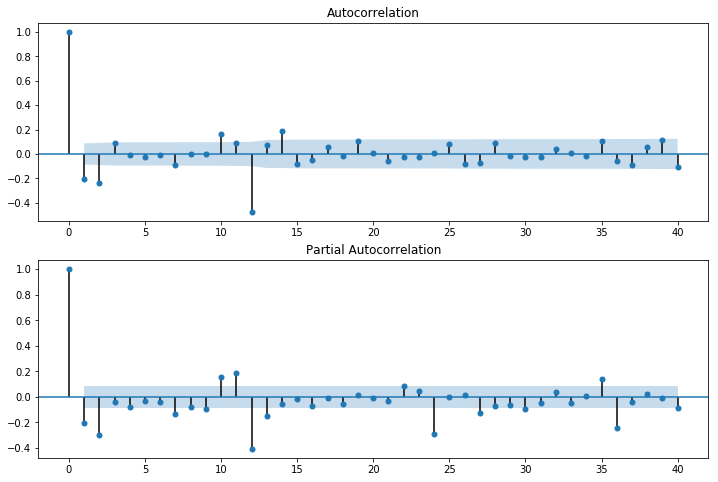

In [42]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [43]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [44]:
%%time

aic_results = []
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            # some methods fail to converge; increasing max iterations helps
            # some methods have verbose output
            #results = mod.fit(maxiter=200, method='nm')
            # defaults appear to ignore maxiter
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
            if results.mle_retvals is not None and results.mle_retvals['converged'] == False:
                print('if block', results.mle_retvals)
            aic_results.append(results.aic)
        except:
            continue
aic_results.sort()
print('Best AIC found: ', aic_results[0])

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:4804.065995091217
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:4135.625648186413
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:2572.1947577443707


/Users/seth/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2504.20950283584
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2544.146426616796
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2465.1472629968566
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:2511.043139693216
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2505.8402380709176
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:4157.561225515799
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:3572.1059017686994
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:2334.7247254084386
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:2245.5073864208002
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:2329.044601405044


/Users/seth/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2218.6800972074707
if block {'fopt': 2.113460895991846, 'gopt': array([-1.96331840e-07,  1.15599086e-04,  4.28501679e-07, -4.91078289e-06]), 'fcalls': 510, 'warnflag': 2, 'converged': False, 'iterations': 32}
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:2262.06279798991
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2247.532772188919
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2932.1335743055993
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:2616.0128108187673
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:2329.0474119306878
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:2068.3633517951876
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:2295.7488324789865
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:2108.956656304842
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:2162.692421772843
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:2074.0481533369784
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2842.7367252748636
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:2581.5410372141996
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:2281.27481945106
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:2040.58527771279
ARIMA(0, 

Now evaluate the model found from the above code

In [45]:
mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                          Statespace Model Results                                         
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Tue, 14 May 2019   AIC                           2003.553
Time:                                                     10:13:31   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

In [46]:
mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1,1,2), 
                                seasonal_order=(0,2,2,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                          Statespace Model Results                                         
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 2)x(0, 2, 2, 12)   Log Likelihood                -974.772
Date:                                             Tue, 14 May 2019   AIC                           1961.544
Time:                                                     10:13:38   BIC                           1986.473
Sample:                                                 01-31-1973   HQIC                          1971.351
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

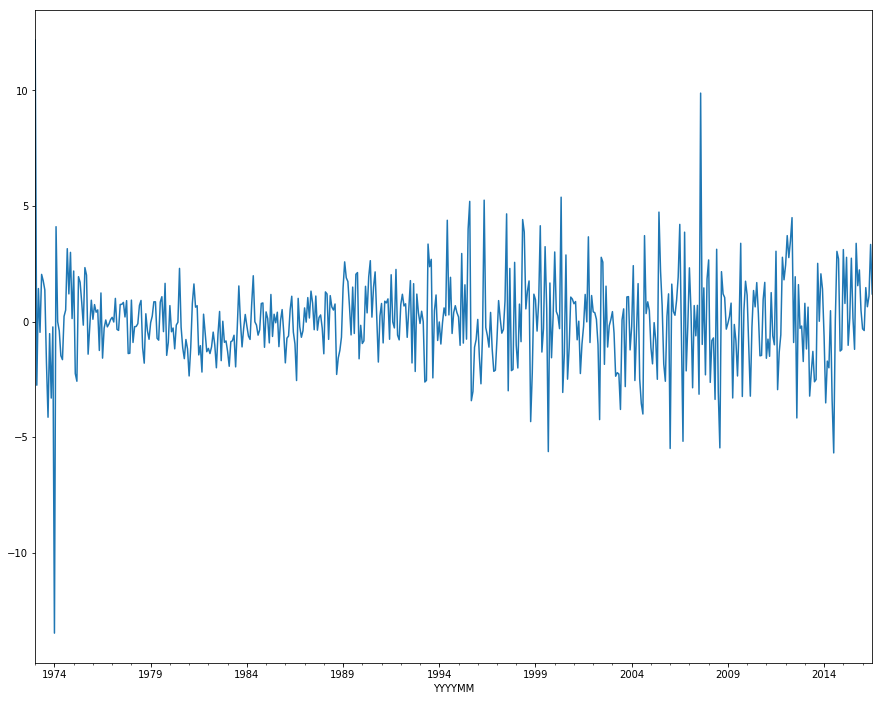

In [47]:
results.resid.plot()

In [48]:
print(results.resid.describe())

count    523.000000
mean       0.039080
std        1.999488
min      -13.471910
25%       -1.017179
50%       -0.005258
75%        1.041607
max       12.175000
dtype: float64


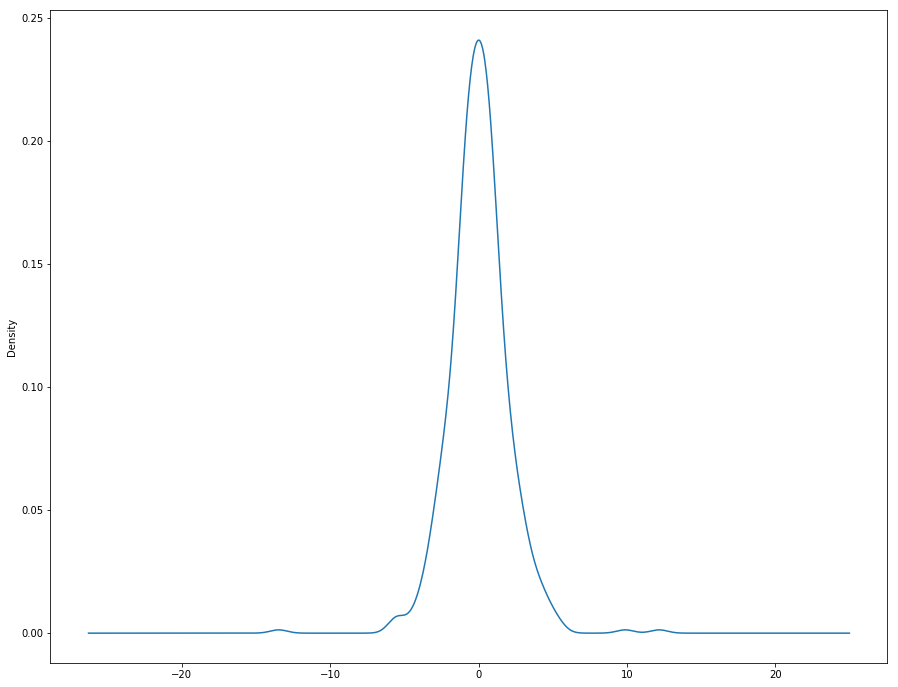

In [49]:
results.resid.plot(kind='kde')

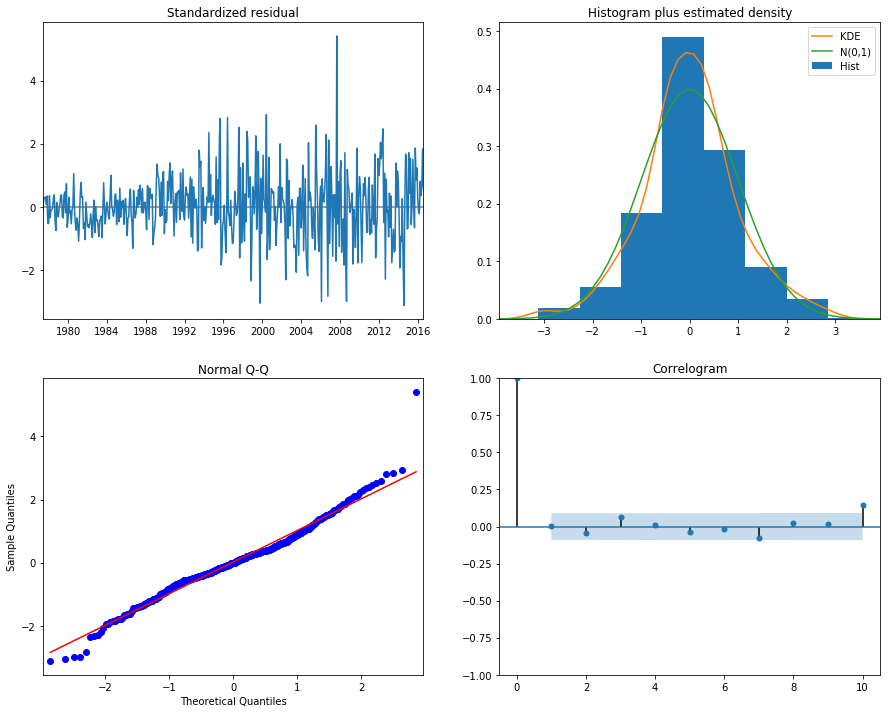

In [50]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [100]:
pred = results.get_prediction(start = 480, end = 523, dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci.head())
print(pred_ci.tail())

            lower Natural Gas Electric Power Sector CO2 Emissions  \
2013-01-31                                          30.203835       
2013-02-28                                          29.088380       
2013-03-31                                          28.958985       
2013-04-30                                          30.708073       
2013-05-31                                          32.104079       

            upper Natural Gas Electric Power Sector CO2 Emissions  
2013-01-31                                          37.257325      
2013-02-28                                          36.141870      
2013-03-31                                          36.012475      
2013-04-30                                          37.761563      
2013-05-31                                          39.157569      
            lower Natural Gas Electric Power Sector CO2 Emissions  \
2016-04-30                                          35.749012       
2016-05-31                             

ax = mte['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

In [99]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2013-01-31':]

print(mte_truth.head())
print(mte_truth.tail())

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(np.sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

YYYYMM
2013-01-31    34.294
2013-02-28    30.857
2013-03-31    32.778
2013-04-30    30.640
2013-05-31    33.337
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64
YYYYMM
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64
The Mean Squared Error (MSE) of the forecast is 4.09
The Root Mean Square Error (RMSE) of the forcast: 2.0236


In [90]:
np.sum((mte_forecast-mte_truth)**2)

176.08063602044217

In [91]:
# first version
mte_forecast = pred.predicted_mean
mte_truth = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 4.09
The Root Mean Square Error (RMSE) of the forcast: 2.0236


In [92]:
#print(mte_forecast)
#print(mte_truth)

print(len(mte_forecast))
print(len(mte_truth))

print(type(mte_forecast))
print(type(mte_truth))

print(sum((mte_forecast-mte_truth)**2))
np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))

43
43
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
176.0806360204422


2.0235855583847466

In [93]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

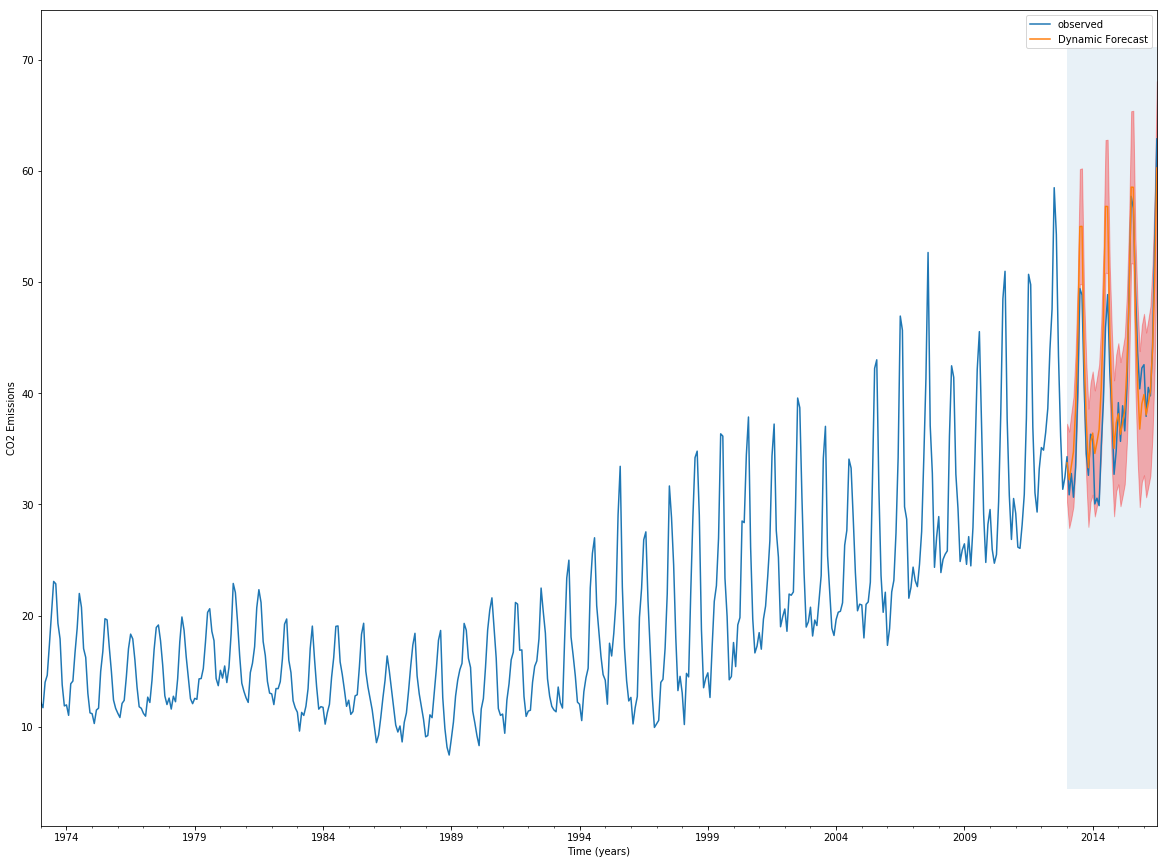

In [94]:
ax = mte['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2013-01-31'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [95]:
# second version
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 14.39
The Root Mean Square Error (RMSE) of the forcast: 3.7936


In [96]:
print(sum((mte_forecast-mte_orginal)**2))
np.sqrt(sum((mte_forecast-mte_orginal)**2)/len(mte_forecast))

618.827215958507


3.793590726961227

In [97]:
print(type(mte_forecast))
print(type(mte_orginal))

print(sum((mte_forecast-mte_orginal)**2))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
618.827215958507
